In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [33]:
x=df.iloc[:,1:2]
print(x)
print(x.shape)

            Open
0      19.000000
1      25.790001
2      25.000000
3      23.000000
4      20.000000
...          ...
2411  568.489990
2412  575.690002
2413  632.419983
2414  640.000000
2415  673.690002

[2416 rows x 1 columns]
(2416, 1)


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.00434948],
       [0.01467569],
       [0.01347426],
       ...,
       [0.93723668],
       [0.94876435],
       [1.        ]])

In [35]:
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(x_scaled[i-60:i, 0])
    y_train.append(x_scaled[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [36]:
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [37]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1198, 60, 1)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [39]:
x_test = []
y_test = []
for i in range(60, len(x_scaled)):
    x_test.append(x_scaled[i-60:i, 0])
    y_test.append(x_scaled[i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)

In [40]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [41]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [42]:
regressor=Sequential()
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [43]:
regressor.compile(optimizer='adam',loss='huber')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
30/30 [==============================] - 6s 48ms/step - loss: 0.0030
Epoch 2/100
30/30 [==============================] - 1s 47ms/step - loss: 6.2527e-04
Epoch 3/100
30/30 [==============================] - 1s 47ms/step - loss: 4.7295e-04
Epoch 4/100
30/30 [==============================] - 1s 47ms/step - loss: 3.8572e-04
Epoch 5/100
30/30 [==============================] - 1s 48ms/step - loss: 4.1079e-04
Epoch 6/100
30/30 [==============================] - 1s 47ms/step - loss: 3.8547e-04
Epoch 7/100
30/30 [==============================] - 1s 47ms/step - loss: 3.2984e-04
Epoch 8/100
30/30 [==============================] - 1s 48ms/step - loss: 3.7442e-04
Epoch 9/100
30/30 [==============================] - 1s 47ms/step - loss: 3.4319e-04
Epoch 10/100
30/30 [==============================] - 1s 47ms/step - loss: 3.4726e-04
Epoch 11/100
30/30 [==============================] - 1s 48ms/step - loss: 2.8683e-04
Epoch 12/100
30/30 [==============================] - 1s 48ms/step 

In [44]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

74/74 [==============================] - 2s 16ms/step


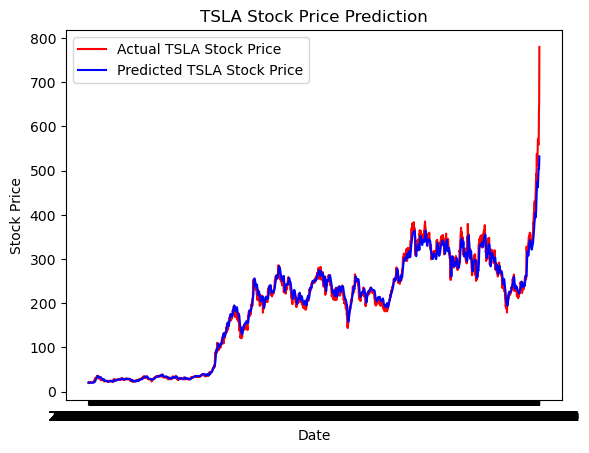

In [45]:
plt.plot(df['Date'][len(df) - len(predicted_stock_price):], df['Close'][len(df) - len(predicted_stock_price):], color='red', label='Actual TSLA Stock Price')
plt.plot(df['Date'][len(df) - len(predicted_stock_price):], predicted_stock_price, color='blue', label='Predicted TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()